# Photutils Tutorial
I am following the user guide on the photutils website to learn the basic options that Photutils offers.

## Detecting Stars

In [19]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.stats import sigma_clipped_stats
from astropy.visualization import SqrtStretch, simple_norm
from astropy.visualization.mpl_normalize import ImageNormalize

from photutils.aperture import CircularAperture
from photutils.datasets import load_star_image, make_100gaussians_image
from photutils.detection import DAOStarFinder, find_peaks

import cmasher as cms

In [3]:
hdu = load_star_image()
data = hdu.data[0:401, 0:401]
mean, median, std = sigma_clipped_stats(data, sigma=3.0)
print(np.array((mean, median, std)))

[3668.09661146 3649.          204.41388592]


In [5]:
daofind = DAOStarFinder(fwhm=3.0, threshold=5.*std)
sources = daofind(data - median)
for col in sources.colnames:
    if col not in ('id', 'npix'):
        sources[col].info.format = '%.2f'    # for consistent table output

sources.pprint(max_width=76)

 id xcentroid ycentroid sharpness ...   peak     flux    mag   daofind_mag
--- --------- --------- --------- ... ------- --------- ------ -----------
  1    144.25      6.38      0.58 ... 6903.00  45735.00 -11.65       -1.89
  2    208.67      6.82      0.48 ... 7896.00  62118.00 -11.98       -2.07
  3    216.93      6.58      0.69 ... 2195.00  12436.00 -10.24       -0.55
  4    351.63      8.55      0.49 ... 6977.00  55313.00 -11.86       -1.93
  5    377.52     12.07      0.52 ... 1260.00   9078.00  -9.89       -0.12
  6    294.27     12.74      0.68 ... 2059.00  15818.00 -10.50       -0.43
  7     85.22     14.71      0.62 ... 1458.00   7413.00  -9.67       -0.24
  8    137.94     17.46      0.54 ... 5451.00  38267.00 -11.46       -1.68
  9    130.33     18.68      0.63 ... 3432.00  19551.00 -10.73       -1.14
 10    143.11     18.62      0.52 ... 6722.00  48799.00 -11.72       -1.90
...       ...       ...       ... ...     ...       ...    ...         ...
276    292.59    389.31  

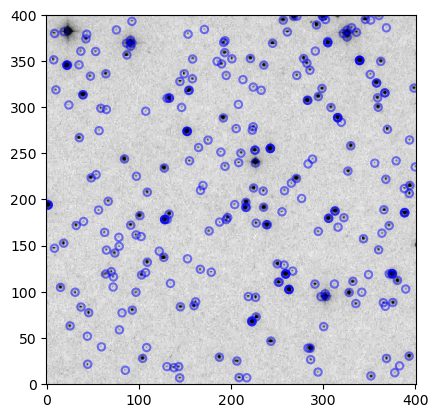

In [9]:
# Plot the image and mark the location of detected sources
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(positions, r=4.0)
norm = ImageNormalize(stretch=SqrtStretch())
plt.imshow(data, cmap='Greys', origin='lower', norm=norm,
          interpolation='nearest')
apertures.plot(color='blue', lw=1.5, alpha=0.5)

## Masking Regions

In [10]:
mask = np.zeros(data.shape, dtype=bool)
mask[50:151, 50:351] = True
mask[250:351, 150:351] = True
sources = daofind(data - mean, mask=mask)

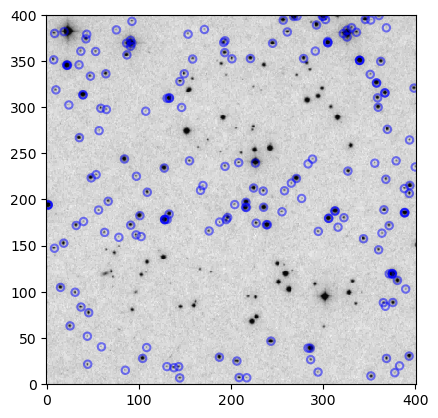

In [12]:
new_positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
new_apertures = CircularAperture(new_positions, r=4.0)
new_norm = ImageNormalize(stretch=SqrtStretch())
plt.imshow(data, cmap='Greys', origin='lower', norm=new_norm,
          interpolation='nearest')
new_apertures.plot(color='blue', lw=1.5, alpha=0.5)

## Local Peak Detection

In [14]:
data = make_100gaussians_image()
mean, median, std = sigma_clipped_stats(data, sigma=3.0)
threshold = median + (5.0 * std)
tbl = find_peaks(data, threshold, box_size=11)
tbl['peak_value'].info.format = "%.8g" # for consistent table output
print(tbl[:10])

 id x_peak y_peak peak_value
--- ------ ------ ----------
  1    233      0  27.786048
  2    493      6  18.699406
  3    208      9  22.499317
  4    259     11  16.400909
  5    365     11  17.789691
  6    290     23  34.141532
  7    379     29  16.058562
  8    442     31  32.162038
  9    471     37  24.141928
 10    358     39  18.671565


In [21]:
# plot location of the detected peaks in the image
positions = np.transpose((tbl['x_peak'], tbl['y_peak']))
apertures = CircularAperture(positions, r=5.0)
norm = simple_norm(data, 'sqrt', percent=99.9)
cmap = cms.lavendar 
plt.imshow(data, cmap=cmap, origin='lower', norm=norm, 
          interpolation='nearest')
apertures.plot(color='#0547f9', lw=1.5)
plt.xlim(0, data.shape[1] - 1)
plt.ylim(0, data.shape[0] - 1)

AttributeError: module 'cmasher' has no attribute 'lavendar'